In [2]:
! pip install yfinance

import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 


In [3]:
sns.set_style('whitegrid')
%matplotlib inline
from pandas import Series,DataFrame

import pandas_datareader.data as web
from datetime import datetime


In [5]:
#Setting the end date to today
end = datetime.now()

In [6]:
#Start date set to 1 year back
start = datetime(end.year-1,end.month,end.day)

#### Reading the Data from Yahoo finance website directly

In [7]:
! pip install yfinance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
tick1='AMZN'
tick2='AAPL'
tick3='GOOG'
tick4='MSFT'
AMZN=yf.download(tick1,start,end)
AAPL=yf.download(tick2,start,end)
GOOG=yf.download(tick3,start,end)
MSFT=yf.download(tick4,start,end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Inference:
Now, we have successfully grabbed the data from Yahoo Finance!!

:Amazon's Stock’s minimum, maximum, and average price was

#### **Cleaning the Data**

In [8]:
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,126.830849,128.926832,124.424856,126.595893,126.595893,7.586793e+07
std,24.017845,24.123291,23.824338,23.991986,23.991986,3.407848e+07
min,82.800003,83.480003,81.690002,81.820000,81.820000,3.508860e+07
25%,108.917000,112.659748,106.832502,108.942497,108.942497,5.488022e+07
50%,122.889999,124.688999,120.724998,123.264999,123.264999,6.645665e+07
75%,148.312500,150.495377,144.058624,146.954754,146.954754,8.504750e+07
max,170.438004,171.399994,168.524002,170.404495,170.404495,2.726620e+08


Adding a new column named **Company** in each Dataframe

In [27]:
AAPL['Company'] = 'Apple'
GOOG['Company'] = 'Google'
AMZN['Company'] = 'Amazon'
MSFT['Company'] = 'Microsoft'


:Merging all the Dataframe together to create a single Dataframe



In [ ]:
stocks=pd.concat([AAPL,AMZN,GOOG,MSFT])
stocks.head()

The Store data is a CSv file 

In [10]:
stocks.to_csv('Stocks.csv',index=False)
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1008 entries, 2021-12-30 to 2022-12-29
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1008 non-null   float64
 1   High       1008 non-null   float64
 2   Low        1008 non-null   float64
 3   Close      1008 non-null   float64
 4   Adj Close  1008 non-null   float64
 5   Volume     1008 non-null   int64  
 6   Company    1008 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 63.0+ KB


Checking the basic information of the data

1.   List item
2.   List item


In [28]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1008 entries, 2021-12-30 to 2022-12-29
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1008 non-null   float64
 1   High       1008 non-null   float64
 2   Low        1008 non-null   float64
 3   Close      1008 non-null   float64
 4   Adj Close  1008 non-null   float64
 5   Volume     1008 non-null   int64  
 6   Company    1008 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 63.0+ KB


Checking for null values

In [11]:
stocks.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Company      0
dtype: int64

Checking The Duplicate values

In [30]:
stocks.duplicated().sum()


0

In [36]:
Companies = stocks['Company'].drop_duplicates().values
print(Companies)

['Apple' 'Amazon' 'Google' 'Microsoft']


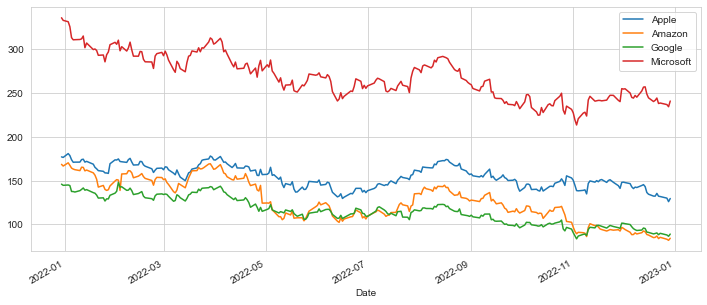

In [37]:
grouped = stocks.groupby('Company')
fig, ax = plt.subplots()

for comp in Companies:
    stock = grouped.get_group(comp)
    stock['Adj Close'].plot(legend=True,figsize=(12,5), ax=ax)

ax.legend(Companies)

The look at the price trend of individual stocks

<AxesSubplot:title={'center':"Amazon's Stock Trend"}, xlabel='Date'>

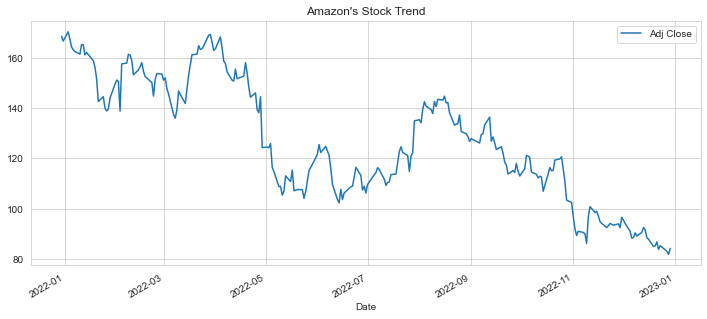

In [14]:
AMZN['Adj Close'].plot(legend=True,figsize=(12,5),title = "Amazon's Stock Trend")

<AxesSubplot:title={'center':"Microsoft's Stock Trend"}, xlabel='Date'>

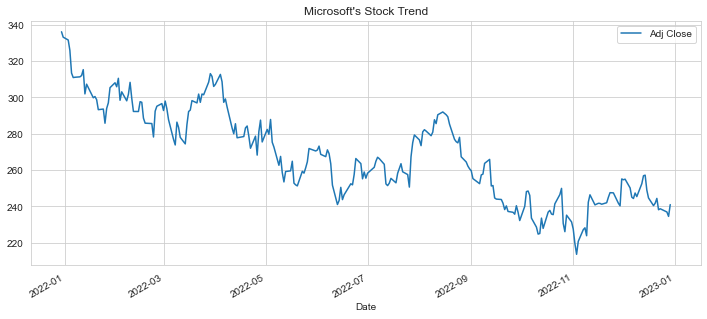

In [15]:
#Plotting the stock's adjusted closing price using pandas
MSFT['Adj Close'].plot(legend=True,figsize=(12,5),title = "Microsoft's Stock Trend")

The Macrosoft's Stock Trend after 2022-01 to today donw value and not groth again 

<AxesSubplot:xlabel='Date'>

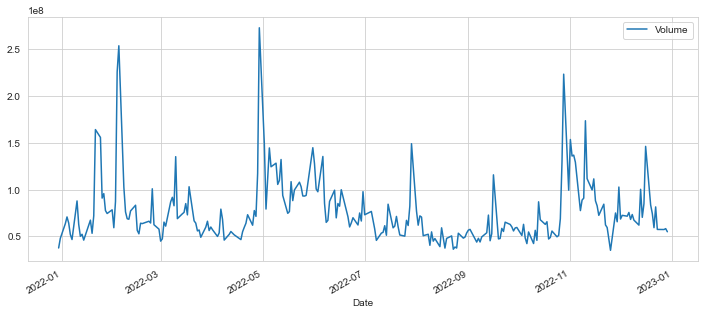

In [16]:
#Plotting the total volume being traded over time
AMZN['Volume'].plot(legend=True,figsize=(12,5))

In [17]:
ma_per_day = [20,50,100]

for ma in ma_per_day:
    column_name = "MA for %s days" %(str(ma))
    
    AMZN[column_name] = AMZN['Adj Close'].rolling(window=ma,center=False).mean()
AMZN.tail()

,Open,High,Low,Close,Adj Close,Volume,Company,MA for 20 days,MA for 50 days,MA for 100 days
Date,,,,,,,,,,
2022-12-22,85.519997,85.680000,82.250000,83.790001,83.790001,81431300,Amazon,90.235500,97.4682,112.8402
2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57390800,Amazon,89.827499,96.9226,112.2975
2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000,Amazon,89.282000,96.4454,111.7022
2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600,Amazon,88.752000,95.8060,111.1124
2022-12-29,82.870003,84.550003,82.550003,84.180000,84.180000,54915700,Amazon,88.134000,95.1624,110.5601


<AxesSubplot:xlabel='Date'>

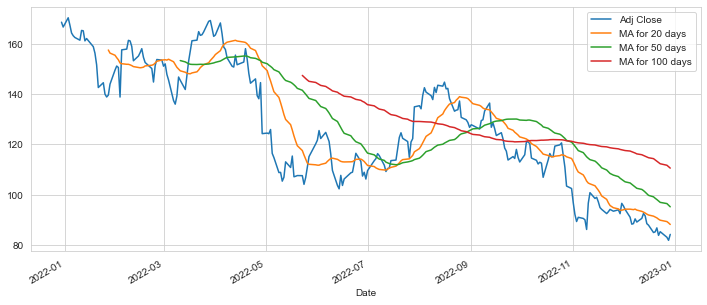

In [18]:
AMZN[['Adj Close','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(12,5))

In [19]:
#The daily return column can be created by using the percentage change over the adjusted closing price
AMZN['Daily Return'] = AMZN['Adj Close'].pct_change()
AMZN['Daily Return'].tail()

Date
2022-12-22   -0.034344
2022-12-23    0.017425
2022-12-27   -0.025924
2022-12-28   -0.014692
2022-12-29    0.028844
Name: Daily Return, dtype: float64

<AxesSubplot:xlabel='Date'>

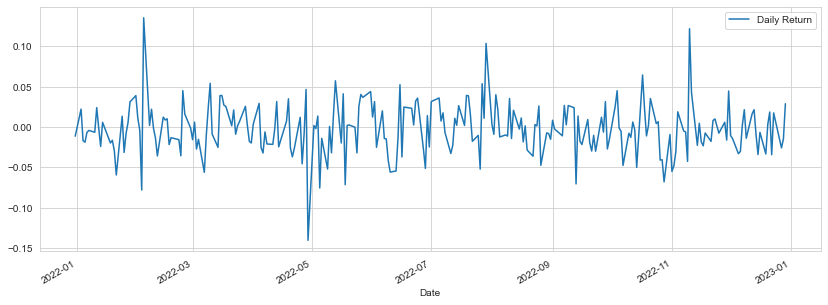

In [20]:
#Plotting the daily return
AMZN['Daily Return'].plot(figsize=(14,5),legend=True)

c:\Users\narayan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return'>

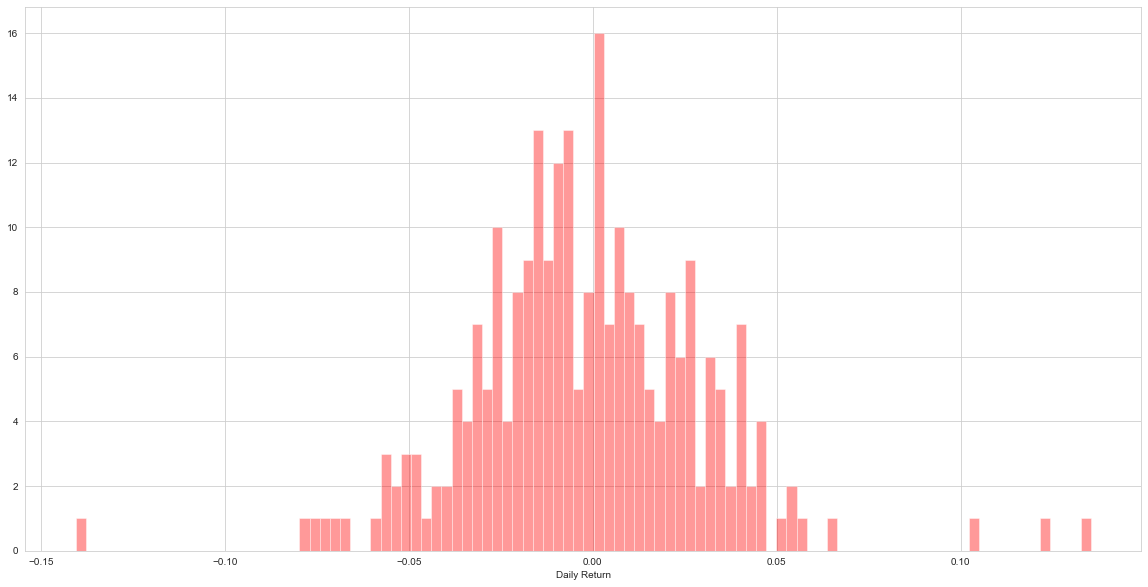

In [21]:
f,ax=plt.subplots(figsize=(20,10))
sns.distplot(AMZN['Daily Return'].dropna(),bins=100,color='red',kde=False,ax=ax)

In [22]:
def trend(x):
    if x > -0.015 and x <= 0.015:
        return 'Slight or No change'
    elif x > 0.015 and x <= 0.04:
        return 'Slight Positive'
    elif x < -0.015 and x >= -0.4:
        return 'Slight Negative'
    elif x > 0.04 and x <= 0.06:
        return 'Positive'
    elif x < -0.04 and x >= -0.06:
        return 'Negative'
    elif x > 0.06 and x <= 0.07:
        return 'Among top gainers'
    elif x < -0.06 and x >= -0.07:
        return 'Among top losers'
    elif x > 0.07:
        return 'Bull run'
    elif x <= -0.07:
        return 'Bear drop'
AMZN['Trend']= np.zeros(AMZN['Daily Return'].count()+1)
AMZN['Trend']= AMZN['Daily Return'].apply(lambda x:trend(x))
AMZN.tail(5)

,Open,High,Low,Close,Adj Close,Volume,Company,MA for 20 days,MA for 50 days,MA for 100 days,Daily Return,Trend
Date,,,,,,,,,,,,
2022-12-22,85.519997,85.680000,82.250000,83.790001,83.790001,81431300,Amazon,90.235500,97.4682,112.8402,-0.034344,Slight Negative
2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57390800,Amazon,89.827499,96.9226,112.2975,0.017425,Slight Positive
2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000,Amazon,89.282000,96.4454,111.7022,-0.025924,Slight Negative
2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600,Amazon,88.752000,95.8060,111.1124,-0.014692,Slight or No change
2022-12-29,82.870003,84.550003,82.550003,84.180000,84.180000,54915700,Amazon,88.134000,95.1624,110.5601,0.028844,Slight Positive


Text(0.5, 1.0, 'Trend Frequency using a Pie Chart')

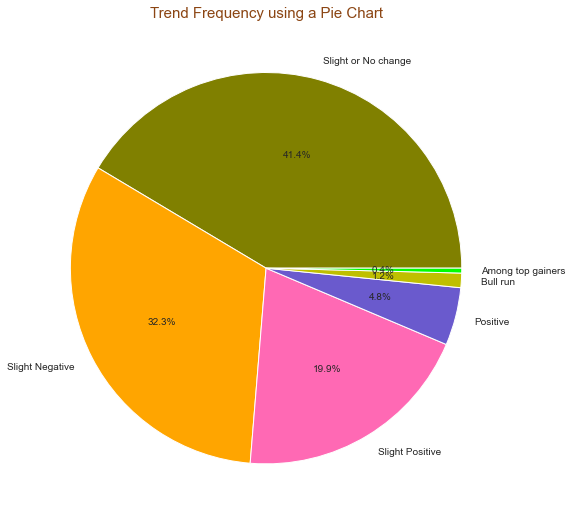

In [23]:
labels=AMZN.Trend.value_counts().index
colors=["olive","orange","hotpink","slateblue","y","lime"]
sizes=AMZN.Trend.value_counts().values
plt.figure(figsize=(9,9))
plt.pie(sizes,labels=labels,colors=colors,autopct="%1.1f%%")
plt.title("Trend Frequency using a Pie Chart",color="saddlebrown",fontsize=15)

In [24]:
all_adj = pd.concat([AAPL['Adj Close'] ,GOOG['Adj Close'],AMZN['Adj Close'],MSFT['Adj Close']], axis = 1)
all_adj.columns = ['Apple','Google','Amazon','Microsoft']
all_adj

,Apple,Google,Amazon,Microsoft
Date,,,,
2021-12-30,177.171722,146.002502,168.644501,336.170013
2021-12-31,176.545380,144.679504,166.716995,333.197906
2022-01-03,180.959747,145.074493,170.404495,331.642456
2022-01-04,178.663071,144.416504,167.522003,325.955780
2022-01-05,173.910660,137.653503,164.356995,313.443024
...,...,...,...,...
2022-12-22,132.229996,88.260002,83.790001,238.190002
2022-12-23,131.860001,89.809998,85.250000,238.729996
2022-12-27,130.029999,87.930000,83.040001,236.960007


In [25]:
pct_df = all_adj.pct_change()
pct_df.tail()

,Apple,Google,Amazon,Microsoft
Date,,,,
2022-12-22,-0.023773,-0.022050,-0.034344,-0.025529
2022-12-23,-0.002798,0.017562,0.017425,0.002267
2022-12-27,-0.013878,-0.020933,-0.025924,-0.007414
2022-12-28,-0.030685,-0.016718,-0.014692,-0.010255
2022-12-29,0.028324,0.028799,0.028844,0.027630


<AxesSubplot:>

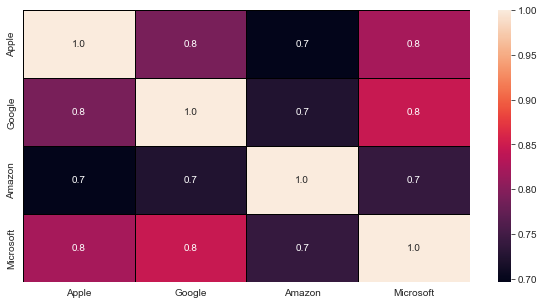

In [26]:
f,ax=plt.subplots(figsize=(10,5))
sns.heatmap(pct_df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax) 